## Deutsch-Jozsa Algorithm Implementation With Qiskit

Importation

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Defining the oracle

In [3]:
def deutsch_jozsa_oracle(n, constant = True):
    #Create an oracle with n qubits and two different possible functions: constant or balanced
    oracle = QuantumCircuit(n + 1) # +1 to include the ancillary qubit which won't be measured
    if constant == True:
        pass
    else:
        for i in range(n):
            oracle.cx(i, n)  # Controlled NOT for each input qubit
                
    return oracle

Defining the algorithm

In [4]:
def deutsch_jozsa_algorithm(n, oracle):
    #Setting up the deutsch-jozsa algorithm with n qubits and the oracle we have defined
    #Step 1: Create a Quantum Circuit with n qubits
    qc = QuantumCircuit(n + 1, n) 
    #The total amount of qubits is n+1 because one of them is the ancillary qubit. The n after shows that.

    # Step 2: Initialize ancillary qubit to |-⟩ for the algorithm by applying a Pauli X gate then a Hadamard gate
    qc.x(n) # |0⟩ to |1⟩
    qc.h(n) # |1⟩ to |-⟩
    
    # Step 3: Apply Hadamard gates to all/n input qubits
    for i in range(n):
        qc.h(i)

    # Step 4: Applying the oracle after the Hadamard gates
    qc.compose(oracle, inplace=True) #Merging the quantum circuit oracle into qc

    # Step 5: Apply Hadamard gates again to all/n input qubits
    for i in range(n):
        qc.h(i)

    # Step 6: Measure input qubits
    for i in range(n):
        qc.measure(i, i)# Measuring the i-th qubit and storing it into the i-th classical bit
    
    return qc

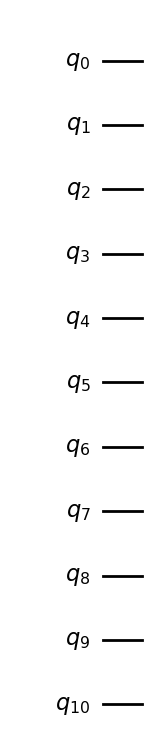

In [5]:
# Define number of input qubits
n = 10  # Adjust as needed

# Constant Oracle
constant_oracle = deutsch_jozsa_oracle(n, constant=True)

# Balanced Oracle
balanced_oracle = deutsch_jozsa_oracle(n, constant=False)

constant_oracle.draw('mpl')

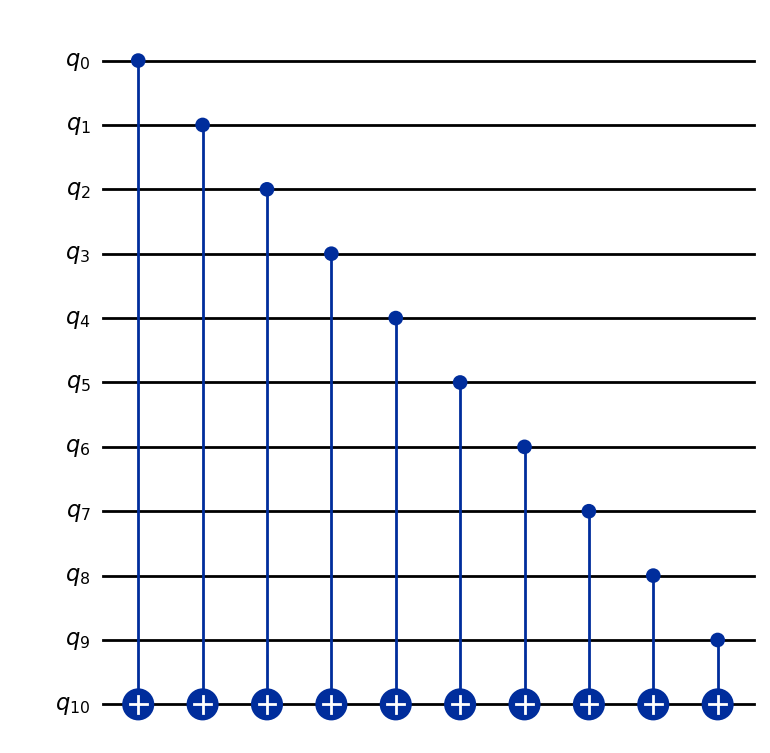

In [6]:
balanced_oracle.draw('mpl')

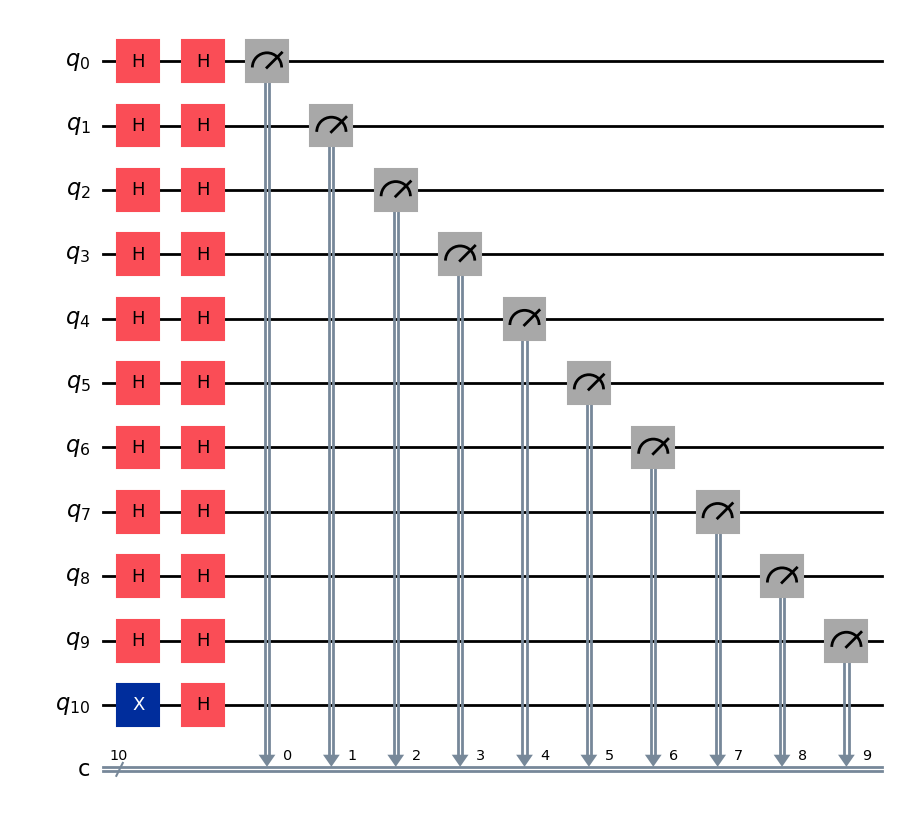

In [7]:
# Create circuits for both cases and drawing them out respectively
constant_circuit = deutsch_jozsa_algorithm(n, constant_oracle)
balanced_circuit = deutsch_jozsa_algorithm(n, balanced_oracle)
constant_circuit.draw('mpl')

How is this a constant function?

1. Since no CNOT gates are applied, the ancillary qubit is not entangled with the input qubits.
2. This is equivalent to setting f(x) as a constant 0 function, as the ancillary qubit is not affected no matter the input. (-1)^f(x) remains as 1
3. Amplitude of |0000000000⟩ = 1/2^10 x=0 ∑ 2^10-1 (-1)^0+x⋅0000000000 = (1/2^10 x=0 ∑ 2^10-1 (-1)^0+0) = 1
4. This means we should get |0000000000⟩

(np.float64(-0.5), np.float64(1001.5), np.float64(128.5), np.float64(-0.5))

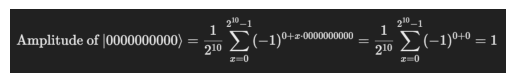

In [22]:
plt.imshow(mpimg.imread('image3.png'))
plt.axis('off')

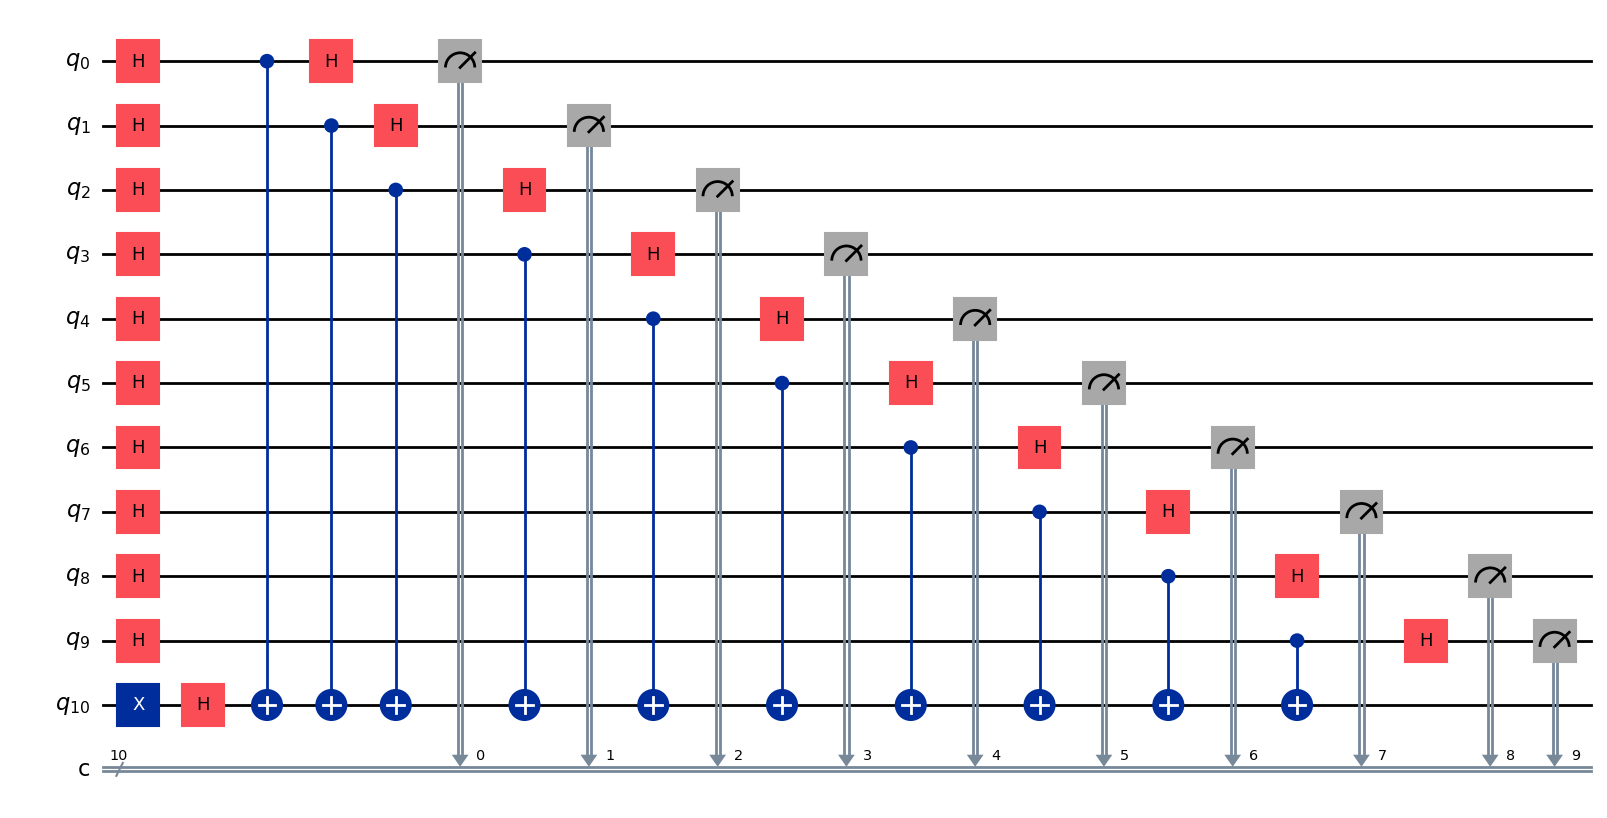

In [14]:
balanced_circuit.draw('mpl')

How is this a balanced function?

1. A balanced function means that half of its output will be 0 while the other half will be 1s.
2. The function we have here will be f(x)=x0⊕x1⊕⋯⊕x9 This is because each xi flips the state of the ancillary qubit if xi = 1 due to the nature of CNOT gates. 
​
 

(np.float64(-0.5), np.float64(452.5), np.float64(177.5), np.float64(-0.5))

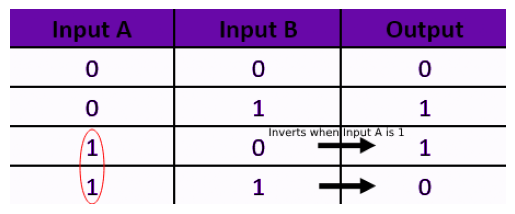

In [18]:
plt.imshow(mpimg.imread('image.png'))
plt.axis('off')

(np.float64(-0.5), np.float64(871.5), np.float64(848.5), np.float64(-0.5))

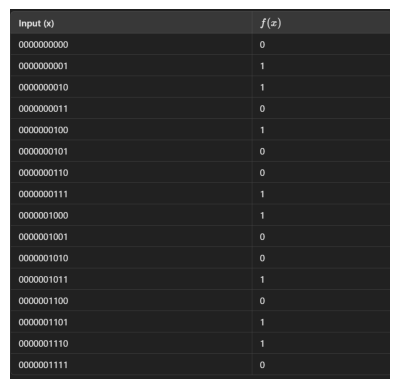

In [23]:
plt.imshow(mpimg.imread('image2.png'))
plt.axis('off')
#Even number of ones: f(x) = 0, Odd number of ones: f(x) = 1, equivalent to our circuit of CNOT gates
#This will lead to an equal number of 0s and 1s in the output

Summation Formula for Final State Amplitude

(np.float64(-0.5), np.float64(663.5), np.float64(114.5), np.float64(-0.5))

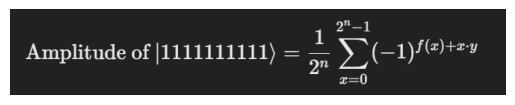

In [20]:
plt.imshow(mpimg.imread('image4.png'))
plt.axis('off')

After applying Hadamard gates to all input qubits for the second time, the final amplitude of |1111111111⟩ = 1/2^n x=0 ∑ 2n-1 (-1)^f(x)+x⋅y
1. f(x) = x0⊕x1⊕⋯⊕x9
2. x⋅y = x0+x1+⋯+x9 since y = 1111111111, x⋅1111111111 = x0+x1+⋯+x9
3. The amplitude becomes 1/2^n x=0 ∑ 2^n-1 (-1)^x0⊕x1⊕⋯⊕x9+x0+x1+⋯+x9
4. If x0⊕x1⊕⋯⊕x9 = 1, it means that among x1 and x9, there is an odd number of ones.
5. If x0⊕x1⊕⋯⊕x9 = 0, it means that among x1 and x9, there is an even number of ones.
6. We can tell that x0⊕x1⊕⋯⊕x9+x0+x1+⋯+x9 will always be an even number, making (-1)^x0⊕x1⊕⋯⊕x9+x0+x1+⋯+x9 = 1
7. Thus, the amplitude of |1111111111⟩ =  (1/2^10 x=0 ∑ 2^10-1 1) = 1, meaning this circuit will always give|1111111111⟩


(np.float64(-0.5), np.float64(462.5), np.float64(107.5), np.float64(-0.5))

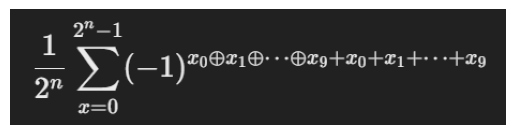

In [24]:
plt.imshow(mpimg.imread('image6.png'))
plt.axis('off')

(np.float64(-0.5), np.float64(642.5), np.float64(129.5), np.float64(-0.5))

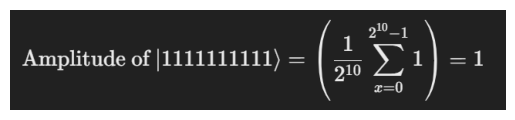

In [21]:
plt.imshow(mpimg.imread('image5.png'))
plt.axis('off')

Let's check it out!

Result(backend_name='aer_simulator', backend_version='0.15.1', qobj_id='', job_id='ab1fb881-34c0-41c8-8246-a33616282793', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3ff': 1024}), header=QobjExperimentHeader(creg_sizes=[['c', 10]], global_phase=0.0, memory_slots=10, n_qubits=11, name='circuit-165', qreg_sizes=[['q', 11]], metadata={}), status=DONE, seed_simulator=3417020815, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 11, 'num_clbits': 10, 'time_taken': 0.0024332, 'sample_measure_time': 0.0009966, 'input_qubit_map': [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]], 'max_memory_mb': 16179, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': F

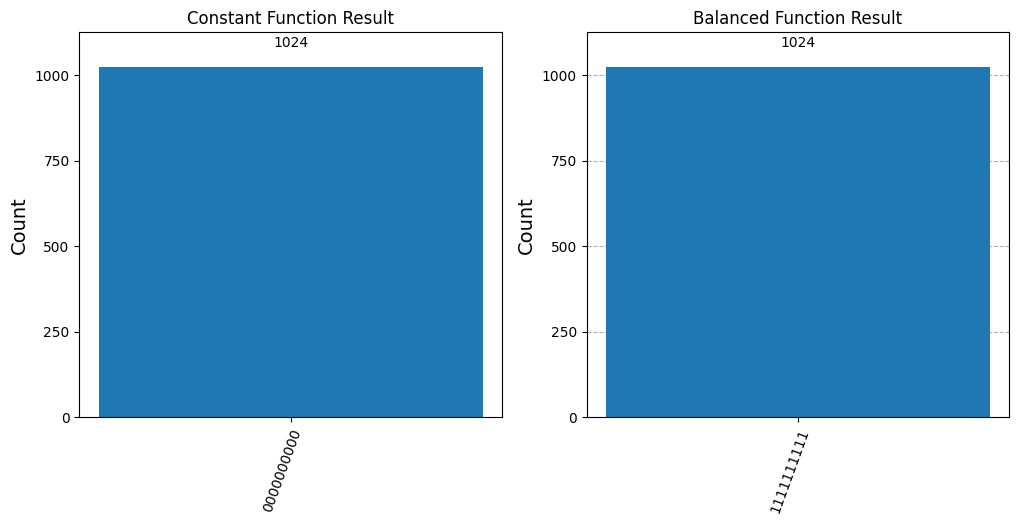

In [17]:
# Simulate both circuits
simulator = AerSimulator()
constant_result = simulator.run(transpile(constant_circuit, simulator)).result()
balanced_result = simulator.run(transpile(balanced_circuit, simulator)).result()
# Get counts
constant_counts = constant_result.get_counts()
balanced_counts = balanced_result.get_counts()
print(balanced_result,constant_result)
print(constant_counts,balanced_counts)
# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# axes[0]being the first subplot and axes[1] being the second
plot_histogram(constant_counts, ax=axes[0])
axes[0].set_title("Constant Function Result")

plot_histogram(balanced_counts, ax=axes[1])
axes[1].set_title("Balanced Function Result")

plt.show()

Here we can see a constant function, in this case a constant zero function always yields a result of |0000000000⟩. A balanced function never gives |0000000000⟩. In this case, x0⊕x1⊕⋯⊕x9 always yields a result of |1111111111⟩. The Deutsch-Jozsa Algorithm has been successfully implemented and proven.